## A.I. Assignment 5

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with tensors in pytorch 
* Create a simple multilayer perceptron model with pytorch
* Visualise the parameters


### Task

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how farst they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.


In [75]:
import torch
import torch.nn as nn
from collections import OrderedDict

In [77]:
architectures = [
    nn.Sequential(OrderedDict([
        ('hidden', nn.Linear(2, 4)),    # 2 input features, 4 output features
        ('activation1', nn.ReLU()),     # ReLU activation function
        ('output', nn.Linear(4, 1)),    # 4 input features, 1 output feature
        ('sigmoid', nn.Sigmoid())       # Sigmoid activation function
    ])),
    nn.Sequential(OrderedDict([
        ('hidden1', nn.Linear(2, 8)),   # 2 input features, 8 output features
        ('activation1', nn.ReLU()),     # ReLU activation function
        ('hidden2', nn.Linear(8, 4)),   # 8 input features, 4 output features
        ('activation2', nn.ReLU()),     # ReLU activation function
        ('output', nn.Linear(4, 1)),    # 4 input features, 1 output feature
        ('sigmoid', nn.Sigmoid())       # Sigmoid activation function
    ])),
    nn.Sequential(OrderedDict([
        ('hidden1', nn.Linear(2, 16)),  # 2 input features, 16 output features
        ('activation1', nn.Tanh()),     # Tanh activation function
        ('hidden2', nn.Linear(16, 8)),  # 16 input features, 8 output features
        ('activation2', nn.Tanh()),     # Tanh activation function
        ('output', nn.Linear(8, 1)),    # 8 input features, 1 output feature
        ('sigmoid', nn.Sigmoid())       # Sigmoid activation function
    ]))
]

In [79]:
print(architectures)

[Sequential(
  (hidden): Linear(in_features=2, out_features=4, bias=True)
  (activation1): ReLU()
  (output): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Sigmoid()
), Sequential(
  (hidden1): Linear(in_features=2, out_features=8, bias=True)
  (activation1): ReLU()
  (hidden2): Linear(in_features=8, out_features=4, bias=True)
  (activation2): ReLU()
  (output): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Sigmoid()
), Sequential(
  (hidden1): Linear(in_features=2, out_features=16, bias=True)
  (activation1): Tanh()
  (hidden2): Linear(in_features=16, out_features=8, bias=True)
  (activation2): Tanh()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)]


In [81]:
data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
print(data_in)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [83]:
data_target = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)
print(data_target)

tensor([[0.],
        [1.],
        [1.],
        [0.]])


In [73]:
results = []
for i, model in enumerate(architectures):
    criterion = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
    
    epochs = 10000
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(data_in)
        loss = criterion(output, data_target)
        loss.backward()
        optimizer.step()
    
    accuracy = ((output > 0.5).float() == data_target).float().mean().item()
    results.append((i, loss.item(), accuracy))
    print(f"Model {i+1}: Loss = {loss.item()}, Accuracy = {accuracy}")

Model 1: Loss = 0.0008308448013849556, Accuracy = 1.0
Model 2: Loss = 0.0012236820766702294, Accuracy = 1.0
Model 3: Loss = 0.0004362354229670018, Accuracy = 1.0


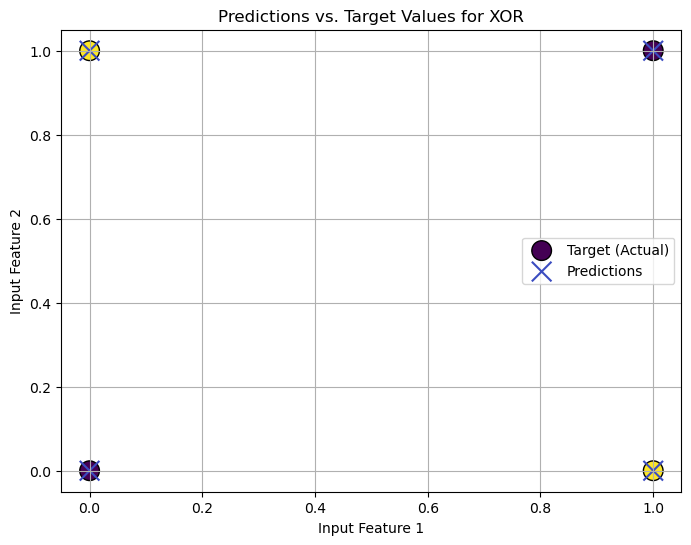

In [87]:
import matplotlib.pyplot as plt

best_model_index = max(results, key=lambda x: x[2])[0]
best_model = architectures[best_model_index]

with torch.no_grad():
    predictions = best_model(data_in)

binary_predictions = (predictions > 0.5).float()

plt.figure(figsize=(8, 6))

plt.scatter(data_in[:, 0], data_in[:, 1], c=data_target.squeeze(), label='Target (Actual)', cmap='viridis', marker='o', s=200, edgecolor='k')

plt.scatter(data_in[:, 0], data_in[:, 1], c=binary_predictions.squeeze(), label='Predictions', cmap='coolwarm', marker='x', s=200)

plt.title('Predictions vs. Target Values for XOR')
plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [85]:
best_model_index = max(results, key=lambda x: x[2])[0]
print(f"Best Model: Model {best_model_index + 1}")
print(f"Best Model Weights: {architectures[best_model_index].state_dict()}")

Best Model: Model 1
Best Model Weights: OrderedDict({'hidden.weight': tensor([[ 0.6448, -0.6263],
        [-0.0533,  0.5167],
        [ 0.4033,  0.1805],
        [-0.1026,  0.0673]]), 'hidden.bias': tensor([-0.1159, -0.3632,  0.3937,  0.4374]), 'output.weight': tensor([[0.0069, 0.0956, 0.3410, 0.2119]]), 'output.bias': tensor([0.4876])})
